## PUNTO 1


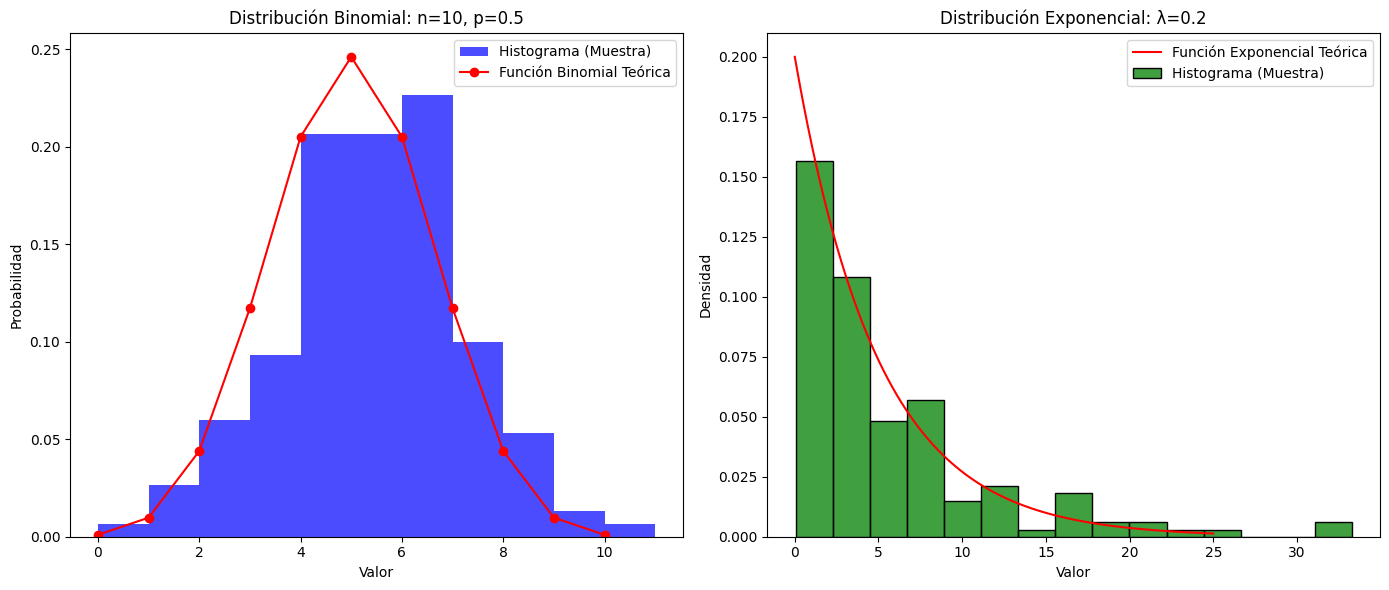

Distribución Binomial: Promedio = 4.96, Cuartiles = [4. 5. 6.], Desviación Estándar = 1.7884071124886525
Distribución Exponencial: Promedio = 5.7464284832700026, Cuartiles = [1.7149069  3.51187984 7.42546195], Desviación Estándar = 6.0890674709053805


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, expon

# Parámetros para la distribución binomial y exponencial
n = 10    # número de ensayos para la binomial
p = 0.5   # probabilidad de éxito para la binomial
lam = 1/5  # parámetro lambda para la exponencial (promedio = 5)

# Generar las muestras aleatorias
muestra_binomial = np.random.binomial(n, p, 150)
muestra_exponencial = np.random.exponential(1/lam, 150)

# Histograma y comparación con la función de masa de probabilidad (pmf) y densidad teórica (pdf)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histograma Binomial
ax[0].hist(muestra_binomial, bins=range(n+2), density=True, alpha=0.7, color='blue', label='Histograma (Muestra)')
x = np.arange(0, n+1)
ax[0].plot(x, binom.pmf(x, n, p), 'ro-', label='Función Binomial Teórica')
ax[0].set_title(f'Distribución Binomial: n={n}, p={p}')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Probabilidad')
ax[0].legend()

# Histograma Exponencial
sns.histplot(muestra_exponencial, kde=False, stat="density", bins=15, color='green', ax=ax[1], label='Histograma (Muestra)')
x = np.linspace(0, 25, 100)
ax[1].plot(x, expon.pdf(x, scale=1/lam), 'r-', label='Función Exponencial Teórica')
ax[1].set_title(f'Distribución Exponencial: λ={lam}')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()
plt.show()

# Cálculos estadísticos
# Para la binomial
promedio_binomial = np.mean(muestra_binomial)
cuartiles_binomial = np.percentile(muestra_binomial, [25, 50, 75])
desviacion_std_binomial = np.std(muestra_binomial)

# Para la exponencial
promedio_exponencial = np.mean(muestra_exponencial)
cuartiles_exponencial = np.percentile(muestra_exponencial, [25, 50, 75])
desviacion_std_exponencial = np.std(muestra_exponencial)

# Mostrar resultados
print(f"Distribución Binomial: Promedio = {promedio_binomial}, Cuartiles = {cuartiles_binomial}, Desviación Estándar = {desviacion_std_binomial}")
print(f"Distribución Exponencial: Promedio = {promedio_exponencial}, Cuartiles = {cuartiles_exponencial}, Desviación Estándar = {desviacion_std_exponencial}")


## PUNTO 2

## PUNTO 3

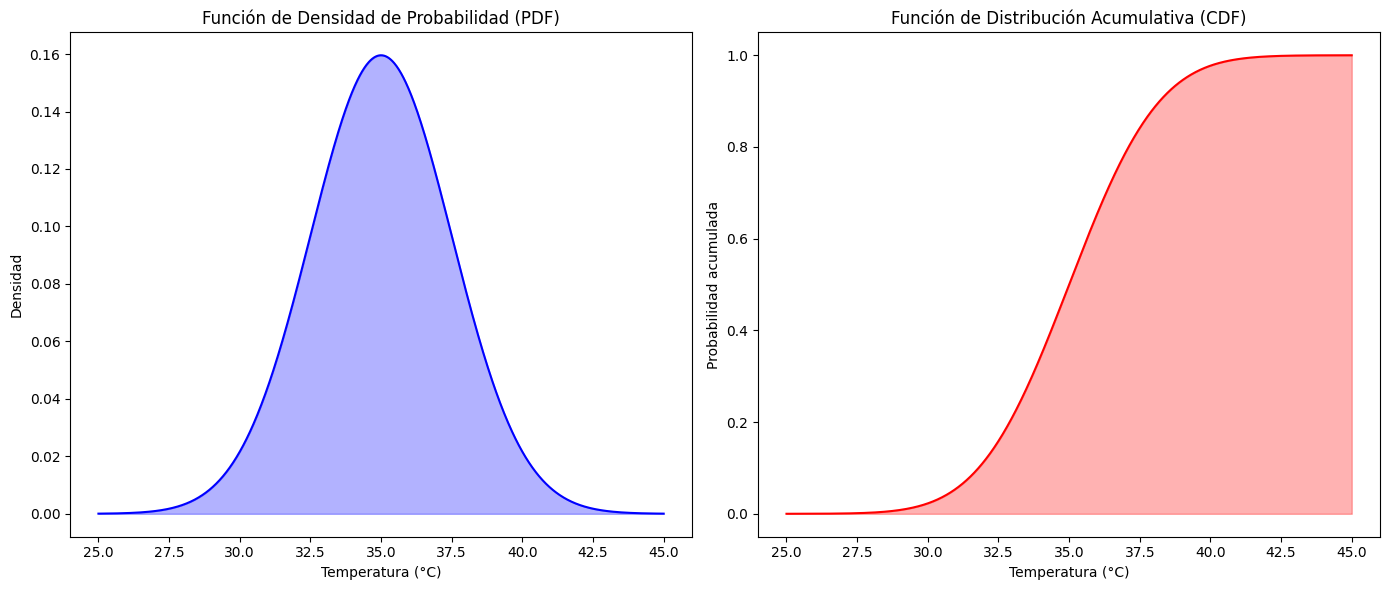

Probabilidad de que el sistema de enfriamiento se active (> 40°C): 0.0228
Porcentaje de tiempo en rango óptimo (30°C - 38°C): 86.22%
Temperatura para activar alerta temprana (10% superior): 38.20°C
Probabilidad de que el promedio de 5 servidores exceda los 37°C: 0.0368
Probabilidad de que más de 25 servidores superen los 41°C simultáneamente: 0.000000


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal
mu = 35  # media
sigma = 2.5  # desviación estándar

# a) Gráficas PDF y CDF
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)

# PDF - Función de Densidad de Probabilidad
pdf = norm.pdf(x, mu, sigma)

# CDF - Función de Distribución Acumulada
cdf = norm.cdf(x, mu, sigma)

# Graficar PDF y CDF
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico PDF
ax[0].plot(x, pdf, 'b-', label="PDF")
ax[0].fill_between(x, 0, pdf, color='blue', alpha=0.3)
ax[0].set_title("Función de Densidad de Probabilidad (PDF)")
ax[0].set_xlabel("Temperatura (°C)")
ax[0].set_ylabel("Densidad")

# Gráfico CDF
ax[1].plot(x, cdf, 'r-', label="CDF")
ax[1].fill_between(x, 0, cdf, color='red', alpha=0.3)
ax[1].set_title("Función de Distribución Acumulativa (CDF)")
ax[1].set_xlabel("Temperatura (°C)")
ax[1].set_ylabel("Probabilidad acumulada")

plt.tight_layout()
plt.show()

# b) Probabilidad de que el sistema de enfriamiento se active (> 40°C)
prob_enfriamiento = 1 - norm.cdf(40, mu, sigma)
print(f"Probabilidad de que el sistema de enfriamiento se active (> 40°C): {prob_enfriamiento:.4f}")

# c) Porcentaje de tiempo que los servidores operan entre 30°C y 38°C
prob_optima = norm.cdf(38, mu, sigma) - norm.cdf(30, mu, sigma)
print(f"Porcentaje de tiempo en rango óptimo (30°C - 38°C): {prob_optima * 100:.2f}%")

# d) Temperatura para el 10% superior de los eventos de temperatura
temp_10p_superior = norm.ppf(0.90, mu, sigma)
print(f"Temperatura para activar alerta temprana (10% superior): {temp_10p_superior:.2f}°C")

# e) Probabilidad de que el promedio de 5 servidores exceda los 37°C
mu_media_5 = mu  # la media del promedio sigue siendo mu
sigma_media_5 = sigma / np.sqrt(5)  # la desviación estándar del promedio
prob_media_37 = 1 - norm.cdf(37, mu_media_5, sigma_media_5)
print(f"Probabilidad de que el promedio de 5 servidores exceda los 37°C: {prob_media_37:.4f}")

# f) Probabilidad de que más de 25 de 1000 servidores superen los 41°C simultáneamente
prob_41_grados = 1 - norm.cdf(41, mu, sigma)
prob_25_mas_41 = 1 - binom.cdf(25, 1000, prob_41_grados)
print(f"Probabilidad de que más de 25 servidores superen los 41°C simultáneamente: {prob_25_mas_41:.6f}")
